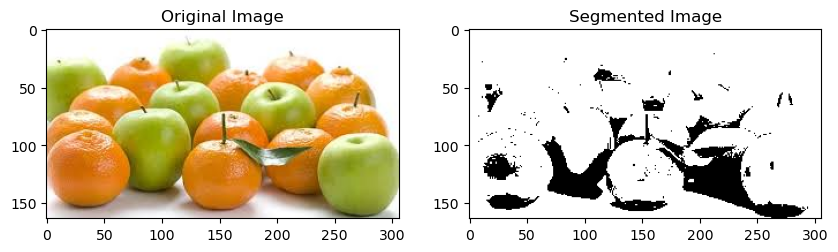

In [58]:
import cv2
import matplotlib.pyplot as plt

# Step 1: Read the image
image = cv2.imread('images.jpeg')

# Step 2: Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Apply thresholding
# The function cv2.threshold returns two outputs: the threshold value and the thresholded image
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Step 4: Display the original and segmented images
plt.figure(figsize=(10,5))

# Original image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Binary segmented image
plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(binary_image, cmap='gray')

plt.show()


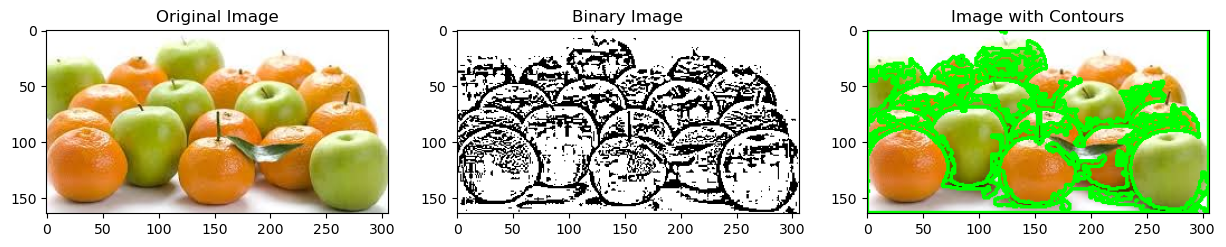

In [64]:
import cv2
import matplotlib.pyplot as plt

# Step 1: Read the image and convert to grayscale
image = cv2.imread('images.jpeg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 2: Apply adaptive thresholding to segment the image
binary_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Step 3: Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Step 4: Draw contours on the original image
contoured_image = cv2.drawContours(image.copy(), contours, -1, (0, 255, 0), 2)

# Display the original, binary, and contoured images
plt.figure(figsize=(15,5))

# Original image
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Binary image
plt.subplot(1, 3, 2)
plt.title('Binary Image')
plt.imshow(binary_image, cmap='gray')

# Contoured image
plt.subplot(1, 3, 3)
plt.title('Image with Contours')
plt.imshow(cv2.cvtColor(contoured_image, cv2.COLOR_BGR2RGB))

plt.show()


Object 1:
  Area: 7.5
  Perimeter: 11.41421353816986
  Bounding Box: (190, 130, 5, 3)
  Centroid: (192, 131)
  Texture Features:
    LBP Mean: 7.99846564642117
    GLCM Contrast: 2.1695721711315477
    GLCM Dissimilarity: 0.017353058776489405
    GLCM Homogeneity: 0.9996941694741948
    GLCM Energy: 0.999660137844748
    GLCM Correlation: 0.7930602562826193
  Color Features:
    Color Histogram (first 5 values): [0. 0. 0. 0. 0.]

Object 2:
  Area: 0.0
  Perimeter: 0.0
  Bounding Box: (187, 120, 1, 1)
  Centroid: (0, 0)
  Texture Features:
    LBP Mean: 7.99984058664116
    GLCM Contrast: 0.6550979608156738
    GLCM Dissimilarity: 0.005117952818872452
    GLCM Homogeneity: 0.9999600184338837
    GLCM Energy: 0.9999600163932988
    GLCM Correlation: -1.999240288690298e-05
  Color Features:
    Color Histogram (first 5 values): [0. 0. 0. 0. 0.]

Object 3:
  Area: 0.0
  Perimeter: 0.0
  Bounding Box: (185, 115, 1, 1)
  Centroid: (0, 0)
  Texture Features:
    LBP Mean: 7.99984058664116
   

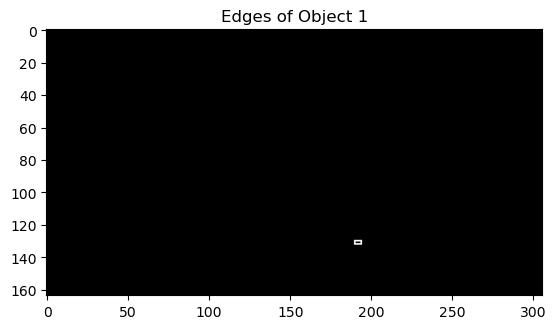

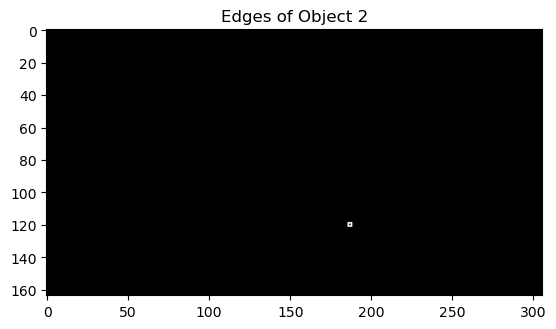

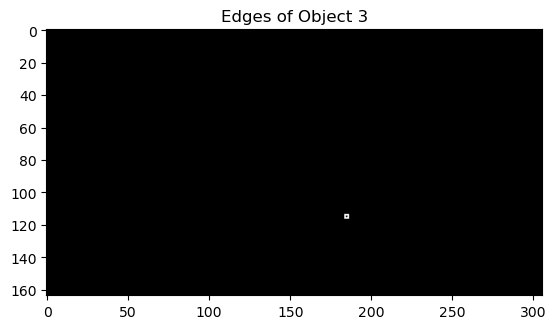

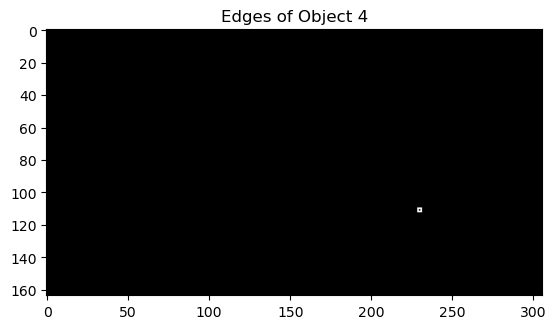

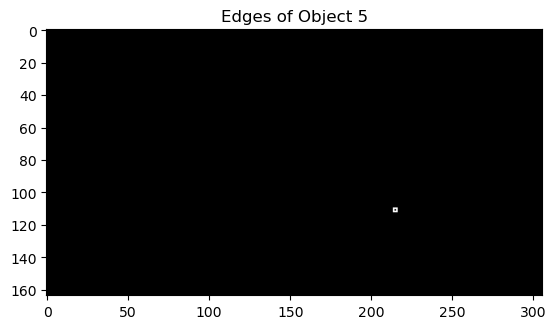

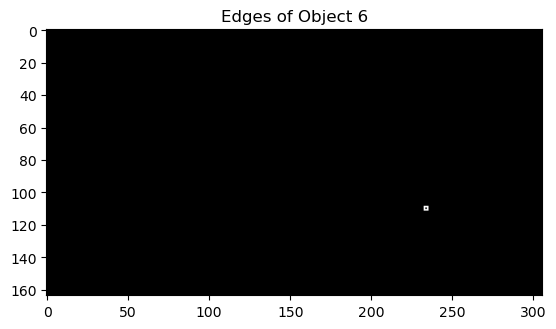

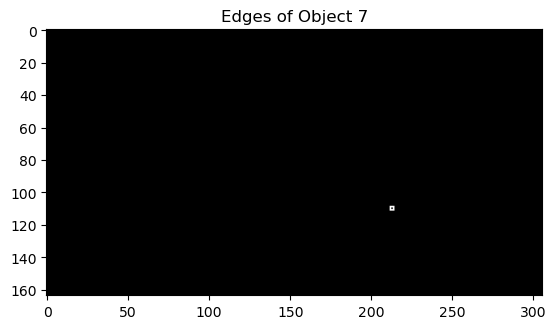

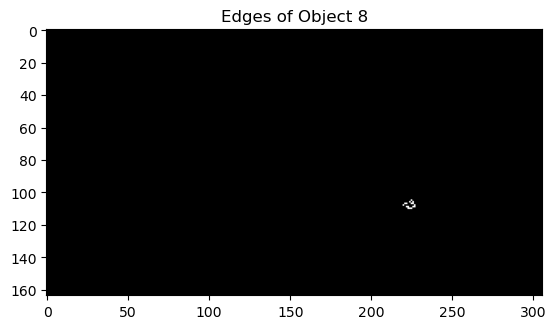

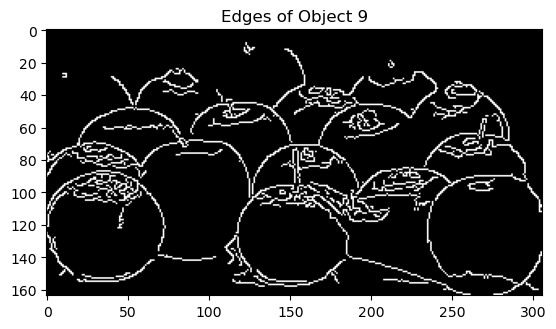

In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern, graycomatrix, graycoprops

# Function to calculate texture features using LBP and GLCM
def extract_texture_features(gray_object):
    # Local Binary Pattern (LBP)
    lbp = local_binary_pattern(gray_object, P=8, R=1, method='uniform')
    
    # Gray-Level Co-occurrence Matrix (GLCM)
    glcm = graycomatrix(gray_object, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]
    
    return lbp, contrast, dissimilarity, homogeneity, energy, correlation

# Step 1: Read the image and convert to grayscale
image = cv2.imread('images.jpeg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 2: Apply thresholding to segment the image
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Step 3: Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Loop through each contour to extract features
for i, contour in enumerate(contours):
    print(f"Object {i+1}:")
    
    # Shape Features
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    x, y, w, h = cv2.boundingRect(contour)
    bounding_box = (x, y, w, h)
    M = cv2.moments(contour)
    centroid = (int(M['m10']/M['m00']), int(M['m01']/M['m00'])) if M['m00'] != 0 else (0, 0)
    
    print(f"  Area: {area}")
    print(f"  Perimeter: {perimeter}")
    print(f"  Bounding Box: {bounding_box}")
    print(f"  Centroid: {centroid}")
    
    # Extract the object's region from the grayscale image
    mask = np.zeros_like(gray_image)
    cv2.drawContours(mask, [contour], -1, 255, thickness=cv2.FILLED)
    object_region = cv2.bitwise_and(gray_image, gray_image, mask=mask)
    
    # Edge Features
    edges = cv2.Canny(object_region, 100, 200)
    
    # Display the edges
    plt.figure()
    plt.title(f"Edges of Object {i+1}")
    plt.imshow(edges, cmap='gray')
    
    # Texture Features
    lbp, contrast, dissimilarity, homogeneity, energy, correlation = extract_texture_features(object_region)
    
    print(f"  Texture Features:")
    print(f"    LBP Mean: {np.mean(lbp)}")
    print(f"    GLCM Contrast: {contrast}")
    print(f"    GLCM Dissimilarity: {dissimilarity}")
    print(f"    GLCM Homogeneity: {homogeneity}")
    print(f"    GLCM Energy: {energy}")
    print(f"    GLCM Correlation: {correlation}")
    
    # Color Features (if the image is not grayscale)
    if len(image.shape) == 3:
        object_region_color = cv2.bitwise_and(image, image, mask=mask)
        color_histogram = cv2.calcHist([object_region_color], [0, 1, 2], mask, [8, 8, 8], [0, 256, 0, 256, 0, 256])
        color_histogram = cv2.normalize(color_histogram, color_histogram).flatten()
        
        print(f"  Color Features:")
        print(f"    Color Histogram (first 5 values): {color_histogram[:5]}")
    
    print()

plt.show()

In [77]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from skimage.feature import local_binary_pattern, graycomatrix, graycoprops

def extract_features(contour, gray_image, color_image):
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    x, y, w, h = cv2.boundingRect(contour)
    M = cv2.moments(contour)
    centroid_x = int(M['m10'] / M['m00']) if M['m00'] != 0 else 0
    centroid_y = int(M['m01'] / M['m00']) if M['m00'] != 0 else 0

    mask = np.zeros_like(gray_image)
    cv2.drawContours(mask, [contour], -1, 255, thickness=cv2.FILLED)
    object_region = cv2.bitwise_and(gray_image, gray_image, mask=mask)

    lbp = local_binary_pattern(object_region, P=8, R=1, method='uniform')
    lbp_mean = np.mean(lbp)

    glcm = graycomatrix(object_region, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]

    object_region_color = cv2.bitwise_and(color_image, color_image, mask=mask)
    color_histogram = cv2.calcHist([object_region_color], [0, 1, 2], mask, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    color_histogram = cv2.normalize(color_histogram, color_histogram).flatten()

    features = np.hstack([area, perimeter, w, h, centroid_x, centroid_y, lbp_mean, contrast, dissimilarity, homogeneity, energy, correlation, color_histogram])

    return features

image_files = ['image1.jpg', 'image2.jpg', 'image3.jpg']  # Replace with your image paths
labels = ['circle', 'square', 'triangle']  # Replace with your labels

features_list = []
labels_list = []

for img_file, label in zip(image_files, labels):
    image = cv2.imread("images.jpeg")
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    for contour in contours:
        features = extract_features(contour, gray_image, image)
        features_list.append(features)
        labels_list.append(label)

X = np.array(features_list)
y = np.array(labels_list)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.2222222222222222
Classification Report:
              precision    recall  f1-score   support

      circle       0.29      1.00      0.44         2
      square       0.00      0.00      0.00         6
    triangle       0.00      0.00      0.00         1

    accuracy                           0.22         9
   macro avg       0.10      0.33      0.15         9
weighted avg       0.06      0.22      0.10         9



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [81]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern, graycomatrix, graycoprops

def extract_features_from_reference(image_path):
    # Read the reference image
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply thresholding to segment the reference object
    _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    
    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Assuming the largest contour is the reference object
    contour = max(contours, key=cv2.contourArea)
    
    # Shape Features
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    x, y, w, h = cv2.boundingRect(contour)
    M = cv2.moments(contour)
    centroid_x = int(M['m10'] / M['m00']) if M['m00'] != 0 else 0
    centroid_y = int(M['m01'] / M['m00']) if M['m00'] != 0 else 0
    
    # Extract the object's region from the grayscale image
    mask = np.zeros_like(gray_image)
    cv2.drawContours(mask, [contour], -1, 255, thickness=cv2.FILLED)
    object_region = cv2.bitwise_and(gray_image, gray_image, mask=mask)
    
    # Edge Features (Canny edge detection)
    edges = cv2.Canny(object_region, 100, 200)
    
    # Texture Features (using LBP)
    lbp = local_binary_pattern(object_region, P=8, R=1, method='uniform')
    lbp_mean = np.mean(lbp)
    
    # GLCM Texture Features
    glcm = graycomatrix(object_region, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]
    
    # Color Features (using color histograms)
    object_region_color = cv2.bitwise_and(image, image, mask=mask)
    color_histogram = cv2.calcHist([object_region_color], [0, 1, 2], mask, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    color_histogram = cv2.normalize(color_histogram, color_histogram).flatten()
    
    # Combine all features into a dictionary
    features = {
        "area": area,
        "perimeter": perimeter,
        "bounding_box": (x, y, w, h),
        "centroid": (centroid_x, centroid_y),
        "edges": edges,
        "lbp_mean": lbp_mean,
        "glcm_contrast": contrast,
        "glcm_dissimilarity": dissimilarity,
        "glcm_homogeneity": homogeneity,
        "glcm_energy": energy,
        "glcm_correlation": correlation,
        "color_histogram": color_histogram
    }
    
    return features

# Example usage:
reference_image_path = 'images.jpeg'
reference_features = extract_features_from_reference(reference_image_path)

# Print out the extracted features
for key, value in reference_features.items():
    if isinstance(value, np.ndarray):
        print(f"{key}: {value.shape}")
    else:
        print(f"{key}: {value}")


area: 46903.0
perimeter: 1365.3036034107208
bounding_box: (0, 0, 306, 164)
centroid: (148, 78)
edges: (164, 306)
lbp_mean: 5.3268571656304795
glcm_contrast: 188.5199720111955
glcm_dissimilarity: 5.247241103558577
glcm_homogeneity: 0.44782149606334354
glcm_energy: 0.14811837376785325
glcm_correlation: 0.977157712534827
color_histogram: (512,)


In [83]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern, graycomatrix, graycoprops

# Function to extract features from a single object (contour)
def extract_features(contour, gray_image, color_image):
    # Shape Features
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    x, y, w, h = cv2.boundingRect(contour)
    M = cv2.moments(contour)
    centroid_x = int(M['m10'] / M['m00']) if M['m00'] != 0 else 0
    centroid_y = int(M['m01'] / M['m00']) if M['m00'] != 0 else 0
    
    # Extract the object's region from the grayscale image
    mask = np.zeros_like(gray_image)
    cv2.drawContours(mask, [contour], -1, 255, thickness=cv2.FILLED)
    object_region = cv2.bitwise_and(gray_image, gray_image, mask=mask)
    
    # Edge Features (Canny edge detection)
    edges = cv2.Canny(object_region, 100, 200)
    
    # Texture Features (using LBP)
    lbp = local_binary_pattern(object_region, P=8, R=1, method='uniform')
    lbp_mean = np.mean(lbp)
    
    # GLCM Texture Features
    glcm = graycomatrix(object_region, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]
    
    # Color Features (using color histograms)
    object_region_color = cv2.bitwise_and(color_image, color_image, mask=mask)
    color_histogram = cv2.calcHist([object_region_color], [0, 1, 2], mask, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    color_histogram = cv2.normalize(color_histogram, color_histogram).flatten()
    
    # Combine all features into a dictionary
    features = {
        "area": area,
        "perimeter": perimeter,
        "bounding_box": (x, y, w, h),
        "centroid": (centroid_x, centroid_y),
        "edges": edges,
        "lbp_mean": lbp_mean,
        "glcm_contrast": contrast,
        "glcm_dissimilarity": dissimilarity,
        "glcm_homogeneity": homogeneity,
        "glcm_energy": energy,
        "glcm_correlation": correlation,
        "color_histogram": color_histogram
    }
    
    return features

# Function to extract features from all objects in the target image
def extract_features_from_target_image(image_path):
    # Read the target image
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply thresholding to segment the target objects
    _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    
    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # List to store features for all objects in the target image
    features_list = []
    
    for contour in contours:
        features = extract_features(contour, gray_image, image)
        features_list.append(features)
    
    return features_list

# Example usage:
target_image_path = 'images.jpeg'
target_features = extract_features_from_target_image(target_image_path)

# Print out the features extracted from the target image
for idx, features in enumerate(target_features):
    print(f"Object {idx + 1}:")
    for key, value in features.items():
        if isinstance(value, np.ndarray):
            print(f"  {key}: {value.shape}")
        else:
            print(f"  {key}: {value}")


Object 1:
  area: 7.5
  perimeter: 11.41421353816986
  bounding_box: (190, 130, 5, 3)
  centroid: (192, 131)
  edges: (164, 306)
  lbp_mean: 7.99846564642117
  glcm_contrast: 2.1695721711315477
  glcm_dissimilarity: 0.017353058776489405
  glcm_homogeneity: 0.9996941694741948
  glcm_energy: 0.999660137844748
  glcm_correlation: 0.7930602562826193
  color_histogram: (512,)
Object 2:
  area: 0.0
  perimeter: 0.0
  bounding_box: (187, 120, 1, 1)
  centroid: (0, 0)
  edges: (164, 306)
  lbp_mean: 7.99984058664116
  glcm_contrast: 0.6550979608156738
  glcm_dissimilarity: 0.005117952818872452
  glcm_homogeneity: 0.9999600184338837
  glcm_energy: 0.9999600163932988
  glcm_correlation: -1.999240288690298e-05
  color_histogram: (512,)
Object 3:
  area: 0.0
  perimeter: 0.0
  bounding_box: (185, 115, 1, 1)
  centroid: (0, 0)
  edges: (164, 306)
  lbp_mean: 7.99984058664116
  glcm_contrast: 0.7072770891643344
  glcm_dissimilarity: 0.0053178728508596574
  glcm_homogeneity: 0.999960018253863
  glcm_

In [85]:
import cv2
import numpy as np
from scipy.spatial import distance
from scipy.stats import pearsonr

# Function to calculate Euclidean distance between two feature vectors
def euclidean_distance(features1, features2):
    return distance.euclidean(features1, features2)

# Function to calculate correlation between two feature vectors
def correlation_similarity(features1, features2):
    # Pearson correlation requires 1D arrays
    return pearsonr(features1, features2)[0]

# Function to compare color histograms using Chi-square method
def compare_histograms(hist1, hist2):
    return cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR)

# Function to match the reference object with objects in the target image
def match_objects(reference_features, target_features_list):
    best_match = None
    best_score = float('inf')  # For Euclidean distance, lower is better
    
    for idx, target_features in enumerate(target_features_list):
        # Compare shape and texture features using Euclidean distance
        shape_texture_dist = euclidean_distance(
            np.array([reference_features['area'], reference_features['perimeter'], reference_features['lbp_mean'],
                      reference_features['glcm_contrast'], reference_features['glcm_dissimilarity'],
                      reference_features['glcm_homogeneity'], reference_features['glcm_energy'],
                      reference_features['glcm_correlation']]),
            np.array([target_features['area'], target_features['perimeter'], target_features['lbp_mean'],
                      target_features['glcm_contrast'], target_features['glcm_dissimilarity'],
                      target_features['glcm_homogeneity'], target_features['glcm_energy'],
                      target_features['glcm_correlation']])
        )
        
        # Compare color histograms using Chi-square method
        color_dist = compare_histograms(reference_features['color_histogram'], target_features['color_histogram'])
        
        # Combine distances (you might want to weight them differently)
        total_score = shape_texture_dist + color_dist
        
        if total_score < best_score:
            best_score = total_score
            best_match = (idx, target_features)
    
    return best_match, best_score

# Assuming reference_features is a dictionary containing features of the reference object
reference_features = extract_features_from_reference('images.jpeg')

# Assuming target_features_list is a list of dictionaries, each containing features of an object in the target image
target_features_list = extract_features_from_target_image('images.jpeg')

# Find the best match
best_match, best_score = match_objects(reference_features, target_features_list)

if best_match:
    print(f"Best match is object {best_match[0] + 1} with a similarity score of {best_score}")
    # You can now visualize or further process the best matching object
    matched_object_features = best_match[1]
    # For example, you might want to display the matched object bounding box
    print("Bounding Box of matched object:", matched_object_features['bounding_box'])
else:
    print("No matching object found.")


Best match is object 9 with a similarity score of 0.0
Bounding Box of matched object: (0, 0, 306, 164)


In [6]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern, graycomatrix, graycoprops

# Load the image
image = cv2.imread('images.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding
_, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [8]:
# Iterate through contours and draw bounding boxes
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # Extract each object
    object_image = gray[y:y+h, x:x+w]

In [22]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern, graycomatrix, graycoprops
from scipy.spatial.distance import euclidean
from scipy.stats import pearsonr
from cv2 import compareHist, HISTCMP_CHISQR, HISTCMP_INTERSECT

# Load the reference image
reference_image = cv2.imread('images.jpeg')
reference_gray = cv2.cvtColor(reference_image, cv2.COLOR_BGR2GRAY)

# Apply thresholding
_, reference_thresh = cv2.threshold(reference_gray, 128, 255, cv2.THRESH_BINARY_INV)

# Find contours in the reference image
reference_contours, _ = cv2.findContours(reference_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Assuming the reference image contains one object, extract the largest contour
reference_contour = max(reference_contours, key=cv2.contourArea)

# Extract features from the reference object
def extract_features(contour, image, gray_image):
    x, y, w, h = cv2.boundingRect(contour)
    object_image = gray_image[y:y+h, x:x+w]
    color_image = image[y:y+h, x:x+w]
    
    # Shape Features
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    bounding_box = (x, y, w, h)
    moments = cv2.moments(contour)
    if moments['m00'] != 0:
        centroid_x = int(moments['m10'] / moments['m00'])
        centroid_y = int(moments['m01'] / moments['m00'])
        centroid = (centroid_x, centroid_y)
    else:
        centroid = (None, None)
    
    # Edge Features
    edges = cv2.Canny(object_image, 100, 200)
    
    # Texture Features - Local Binary Pattern (LBP)
    lbp = local_binary_pattern(object_image, P=8, R=1, method='uniform')
    
    # Texture Features - Gray-Level Co-occurrence Matrix (GLCM)
    glcm = graycomatrix(object_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]
    
    # Color Features
    color_hist = cv2.calcHist([color_image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256]).flatten()
    
    return {
        'area': area,
        'perimeter': perimeter,
        'bounding_box': bounding_box,
        'centroid': centroid,
        'lbp': lbp,
        'edges': edges,
        'glcm_contrast': contrast,
        'glcm_dissimilarity': dissimilarity,
        'glcm_homogeneity': homogeneity,
        'glcm_energy': energy,
        'glcm_correlation': correlation,
        'color_hist': color_hist
    }

reference_features = extract_features(reference_contour, reference_image, reference_gray)


In [24]:
# Load the target image
target_image = cv2.imread('images.jpeg')
target_gray = cv2.cvtColor(target_image, cv2.COLOR_BGR2GRAY)

# Apply thresholding
_, target_thresh = cv2.threshold(target_gray, 128, 255, cv2.THRESH_BINARY_INV)

# Find contours in the target image
target_contours, _ = cv2.findContours(target_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Extract features from each object in the target image
target_features = [extract_features(contour, target_image, target_gray) for contour in target_contours]


In [37]:
from skimage.transform import resize

def resize_features(features, target_size):
    return resize(features, target_size, mode='reflect', anti_aliasing=True).flatten()

# Modify the feature extraction function to include resizing
def extract_features(contour, image, gray_image, lbp_size=(50, 50)):
    x, y, w, h = cv2.boundingRect(contour)
    object_image = gray_image[y:y+h, x:x+w]
    color_image = image[y:y+h, x:x+w]
    
    # Shape Features
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    bounding_box = (x, y, w, h)
    moments = cv2.moments(contour)
    if moments['m00'] != 0:
        centroid_x = int(moments['m10'] / moments['m00'])
        centroid_y = int(moments['m01'] / moments['m00'])
        centroid = (centroid_x, centroid_y)
    else:
        centroid = (None, None)
    
    # Edge Features
    edges = cv2.Canny(object_image, 100, 200)
    
    # Texture Features - Local Binary Pattern (LBP)
    lbp = local_binary_pattern(object_image, P=8, R=1, method='uniform')
    lbp_resized = resize_features(lbp, lbp_size)
    
    # Texture Features - Gray-Level Co-occurrence Matrix (GLCM)
    glcm = graycomatrix(object_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]
    
    # Color Features
    color_hist = cv2.calcHist([color_image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256]).flatten()
    
    return {
        'area': area,
        'perimeter': perimeter,
        'bounding_box': bounding_box,
        'centroid': centroid,
        'lbp': lbp_resized,
        'edges': edges,
        'glcm_contrast': contrast,
        'glcm_dissimilarity': dissimilarity,
        'glcm_homogeneity': homogeneity,
        'glcm_energy': energy,
        'glcm_correlation': correlation,
        'color_hist': color_hist
    }

# Extract features from the reference object with resizing
reference_features = extract_features(reference_contour, reference_image, reference_gray)

# Extract features from each object in the target image with resizing
target_features = [extract_features(contour, target_image, target_gray) for contour in target_contours]


In [39]:
# Define similarity functions
def calculate_similarity(reference_features, target_features):
    # Shape similarity using Euclidean Distance
    shape_similarity = euclidean(
        [reference_features['area'], reference_features['perimeter']],
        [target_features['area'], target_features['perimeter']]
    )
    
    # Texture similarity using Correlation
    texture_similarity = pearsonr(reference_features['lbp'].flatten(), target_features['lbp'].flatten())[0]
    
    # Color histogram similarity using Chi-Square
    color_similarity = cv2.compareHist(np.array(reference_features['color_hist'], dtype=np.float32),
                                       np.array(target_features['color_hist'], dtype=np.float32),
                                       cv2.HISTCMP_CHISQR)
    
    return shape_similarity, texture_similarity, color_similarity

# Compare each object in the target image to the reference object
similarities = [calculate_similarity(reference_features, features) for features in target_features]

# Find the best match (smallest shape similarity, highest texture similarity, smallest color similarity)
best_match_index = np.argmin([shape_sim + color_sim for shape_sim, texture_sim, color_sim in similarities])
best_match_features = target_features[best_match_index]


C:\Users\hp\AppData\Local\Temp\ipykernel_4608\922014856.py:10: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  texture_similarity = pearsonr(reference_features['lbp'].flatten(), target_features['lbp'].flatten())[0]


In [41]:
# Draw bounding box around the detected object in the target image
x, y, w, h = best_match_features['bounding_box']
cv2.rectangle(target_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[253, 248, 250],
        [252, 247, 249],
        [248, 245, 247],
        ...,
        [230, 234, 229],
        [242, 241, 237],
        [242, 241, 237]],

       [[254, 249, 251],
        [253, 248, 250],
        [249, 246, 248],
        ...,
        [226, 230, 225],
        [238, 237, 233],
        [239, 238, 234]],

       [[255, 250, 252],
        [254, 249, 251],
        [250, 247, 249],
        ...,
        [221, 225, 220],
        [235, 234, 230],
        [235, 234, 230]]

In [45]:
cv2.imshow('Detected Object', target_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [50]:
import pandas as pd

# Assign a default label to all detected objects
default_label = 'object'
labeled_data = pd.DataFrame(target_features)
labeled_data['label'] = [default_label] * len(target_features)

# Save to a CSV file
labeled_data.to_csv('labeled_dataset.csv', index=False)